# Fransdana Nadeak
# MID-TEST
-----------
# Exploration Data Analysis Using Titanic Dataset

You can download it here.
https://drive.google.com/open?id=15IyT1ODuDKgZb8WN6iG64hFJRZWJTSAz

# Background 
The dataset contains data for 887 of the real Titanic passengers. Each row represents
one person. The columns describe different attributes about the person including whether they
survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X). The table
below shows the Data Dictionary.

# Objective 
Create a python script that contains the script to answer the questions below. Please put
comments on the script to show which line of codes answers which questions. Please upload the
script after you finish.

# Questions 
1. What is the dimension (col, row) of the data frame?
2. How to know data type of each variable?
3. How many passengers survived (Survived=1) and not-survived (Survived=0)?
4. How to drop column ‘Name’ from the data frame?
5. Add one new column called ‘family’ to represent number of family-member aboard (hint:family = sibsp + parch)
6. As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for non-missing value).
7. Please fill Age missing value with means of existing Age values
8. What is the maximum passenger Age who survived from the tragedy?
9. How many passengers survived from each ‘PClass’?
10. How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ?

## Import Library

In [40]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 1. What is the dimension (col, row) of the data frame?

In [5]:
print('Titanic dataset has',data.shape[1], 'Columns and', data.shape[0], 'rows')

Titanic dataset has 8 Columns and 887 rows


## 2. How to know data type of each variable?

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


## 3. How many passengers survived (Survived=1) and not-survived (Survived=0)?

In [19]:
surv=pd.Categorical(data['Survived']).describe()
print('There are',surv['counts'].iloc[1],'survived passengers and',surv['counts'].iloc[0],'not-survived passengers in the Titanic accident')
surv

There are 342 survived passengers and 545 not-survived passengers in the Titanic accident


,counts,freqs
categories,,
0,545,0.614431
1,342,0.385569


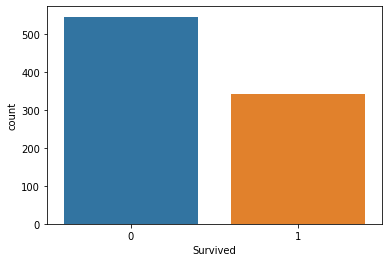

In [20]:
sns.countplot('Survived',data=data)

## 4.How to drop column ‘Name’ from the data frame?

To drop the column, we use method '.drop' with axis=1

In [67]:
data=data.drop('Name',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


## 5. Add one new column called ‘family’ to represent number of family-member aboard (hint:family = sibsp + parch)

In [21]:
data['Family'] = data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard']
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


## 6. As shown, columns ‘Age’ contains missing values. Please add new column named ‘Age_miss’ to indicate whether Age is missing or not (Age_miss = ‘YES’ for missing value and ‘NO’ for non-missing value).

In [43]:
data['Age_miss']=None
data['Age_miss'][data['Age']==None]='Yes'
data['Age_miss'][data['Age']!=None]='No'
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age_miss
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,No
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,No
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,No
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,No
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,No


## 7. Please fill Age missing value with means of existing Age values

In [45]:
data['Age'][data['Age_miss']=='Yes']=data['Age'].mean()
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age_miss
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,No
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,No
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,No
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,No
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,No


## 8. What is the maximum passenger Age who survived from the tragedy? 

In [71]:
data[data['Survived']==1]['Age'].max()

80.0

## 9. How many passengers survived from each PClass? 

In [34]:
pd.Categorical(data[data['Survived']==1]['Pclass']).describe()[['counts']]

,counts
categories,
1,136
2,87
3,119


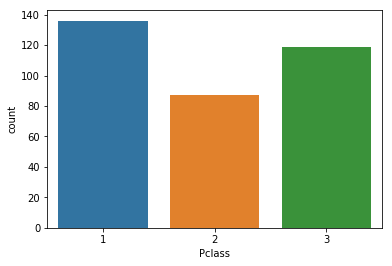

In [77]:
sns.countplot(data[data['Survived']==1]['Pclass'])

## 10. How to randomly split the data frame into 2 parts (titanic1 and titanic2) with proportion of 0.7 for tttanic1 and 0.3 for titanic2 ?

In [87]:
datar=data.sample(frac=1)
titanic1, titanic2 = np.split(datar, [int(.7*len(datar))])
print(titanic1.shape)
titanic1.head()

(620, 8)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family
677,0,3,female,28.0,0,0,8.1375,0
449,0,1,male,30.0,0,0,27.7500,0
62,0,3,male,4.0,3,2,27.9000,5
459,0,1,male,47.0,0,0,38.5000,0
616,0,2,male,26.0,0,0,10.5000,0


In [88]:
print(titanic2.shape)
titanic2.head()

(267, 8)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family
192,1,2,male,3.0,1,1,26.0000,2
72,0,3,male,26.0,1,0,14.4542,1
610,0,3,male,22.0,0,0,7.7500,0
701,0,3,male,26.0,1,0,7.8542,1
512,0,1,male,47.0,0,0,34.0208,0


# Thank You
Created by : Fransdana Nadeak